In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [27]:
df=pd.read_csv("../DataSets/2022_forbes_billionaires.csv")
df

,Unnamed: 0,rank,name,networth,age,country,source,industry
0,0,1,Elon Musk,$219 B,50,United States,"Tesla, SpaceX",Automotive
1,1,2,Jeff Bezos,$171 B,58,United States,Amazon,Technology
2,2,3,Bernard Arnault & family,$158 B,73,France,LVMH,Fashion & Retail
3,3,4,Bill Gates,$129 B,66,United States,Microsoft,Technology
4,4,5,Warren Buffett,$118 B,91,United States,Berkshire Hathaway,Finance & Investments
...,...,...,...,...,...,...,...,...
2595,2595,2578,Jorge Gallardo Ballart,$1 B,80,Spain,pharmaceuticals,Healthcare
2596,2596,2578,Nari Genomal,$1 B,82,Philippines,apparel,Fashion & Retail
2597,2597,2578,Ramesh Genomal,$1 B,71,Philippines,apparel,Fashion & Retail
2598,2598,2578,Sunder Genomal,$1 B,68,Philippines,garments,Fashion & Retail


In [28]:
df=df.drop('Unnamed: 0',axis=1)

In [29]:
df

,rank,name,networth,age,country,source,industry
0,1,Elon Musk,$219 B,50,United States,"Tesla, SpaceX",Automotive
1,2,Jeff Bezos,$171 B,58,United States,Amazon,Technology
2,3,Bernard Arnault & family,$158 B,73,France,LVMH,Fashion & Retail
3,4,Bill Gates,$129 B,66,United States,Microsoft,Technology
4,5,Warren Buffett,$118 B,91,United States,Berkshire Hathaway,Finance & Investments
...,...,...,...,...,...,...,...
2595,2578,Jorge Gallardo Ballart,$1 B,80,Spain,pharmaceuticals,Healthcare
2596,2578,Nari Genomal,$1 B,82,Philippines,apparel,Fashion & Retail
2597,2578,Ramesh Genomal,$1 B,71,Philippines,apparel,Fashion & Retail
2598,2578,Sunder Genomal,$1 B,68,Philippines,garments,Fashion & Retail


In [30]:
df.isnull().sum()

rank        0
name        0
networth    0
age         0
country     0
source      0
industry    0
dtype: int64

In [35]:
df.dtypes

rank          int64
name         object
networth    float64
age           int64
country      object
source       object
industry     object
dtype: object

In [33]:
df.networth=df.networth.replace('[$B]','',regex=True).astype('float64')

In [34]:
df

,rank,name,networth,age,country,source,industry
0,1,Elon Musk,219.0,50,United States,"Tesla, SpaceX",Automotive
1,2,Jeff Bezos,171.0,58,United States,Amazon,Technology
2,3,Bernard Arnault & family,158.0,73,France,LVMH,Fashion & Retail
3,4,Bill Gates,129.0,66,United States,Microsoft,Technology
4,5,Warren Buffett,118.0,91,United States,Berkshire Hathaway,Finance & Investments
...,...,...,...,...,...,...,...
2595,2578,Jorge Gallardo Ballart,1.0,80,Spain,pharmaceuticals,Healthcare
2596,2578,Nari Genomal,1.0,82,Philippines,apparel,Fashion & Retail
2597,2578,Ramesh Genomal,1.0,71,Philippines,apparel,Fashion & Retail
2598,2578,Sunder Genomal,1.0,68,Philippines,garments,Fashion & Retail


In [36]:
mean=np.mean(df.networth)
mean

4.8607499999999995

In [37]:
med=np.median(df.networth)
med

2.4

In [38]:
df['networth'].describe()

count    2600.000000
mean        4.860750
std        10.659671
min         1.000000
25%         1.500000
50%         2.400000
75%         4.500000
max       219.000000
Name: networth, dtype: float64

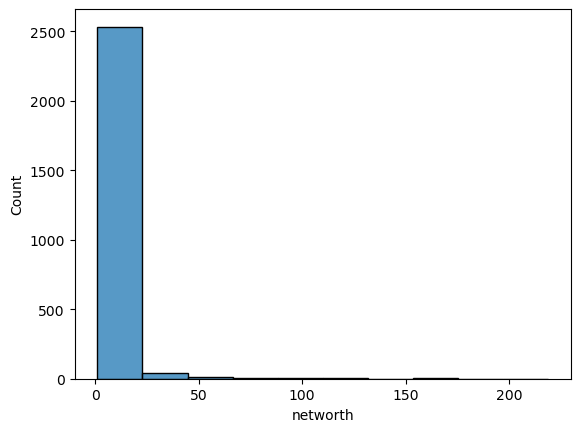

In [43]:
sb.histplot(df.networth,bins=10)
plt.show()

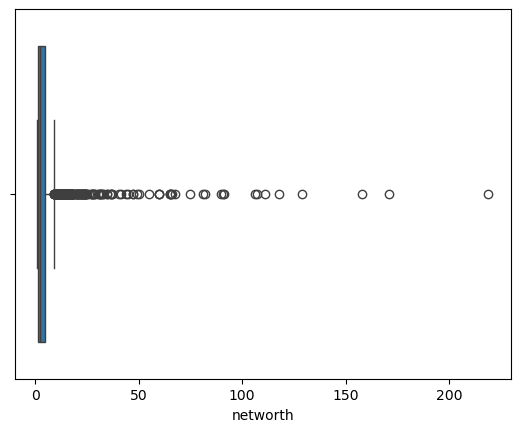

In [46]:
sb.boxplot(x=df.networth)
plt.show()

In [48]:
TB=df.groupby('name')['networth'].sum().nlargest(10)
TB

name
Elon Musk                    219.0
Jeff Bezos                   171.0
Bernard Arnault & family     158.0
Bill Gates                   129.0
Warren Buffett               118.0
Larry Page                   111.0
Sergey Brin                  107.0
Larry Ellison                106.0
Steve Ballmer                 91.4
Mukesh Ambani                 90.7
Name: networth, dtype: float64

In [65]:
tbc=df['country'].value_counts().head(10)
tbc

country
United States    719
China            515
India            161
Germany          130
Russia            81
Hong Kong         67
Canada            64
Brazil            60
Italy             52
Taiwan            51
Name: count, dtype: int64

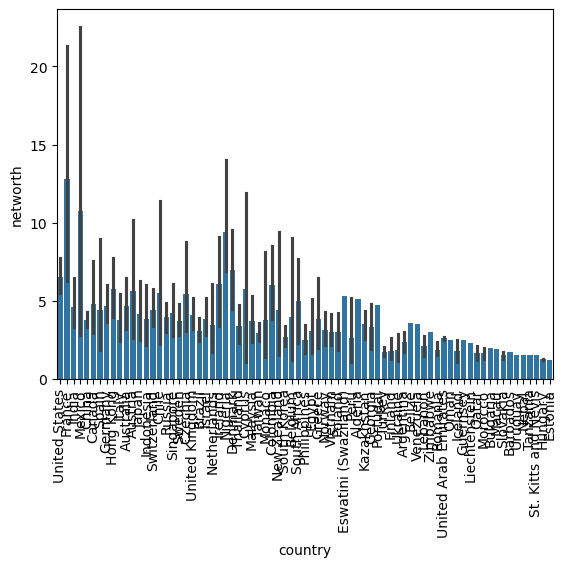

In [62]:
sb.barplot(x=df.country,y=df.networth)
plt.xticks(rotation=90)
plt.show()

In [64]:
mb=df['country'].value_counts().head(5)
mb

country
United States    719
China            515
India            161
Germany          130
Russia            81
Name: count, dtype: int64

In [71]:
avnw=df.groupby('industry')['networth'].mean()
avnw

industry
Automotive                     8.443478
Construction & Engineering     2.811628
Diversified                    5.278090
Energy                         4.250538
Fashion & Retail               6.557724
Finance & Investments          4.493005
Food & Beverage                4.643532
Gambling & Casinos             4.678261
Healthcare                     3.343868
Logistics                      5.605714
Manufacturing                  3.353416
Media & Entertainment          5.195789
Metals & Mining                5.816418
Real Estate                    3.628571
Service                        3.649020
Sports                         3.753846
Technology                     6.590881
Telecom                        5.860000
Name: networth, dtype: float64

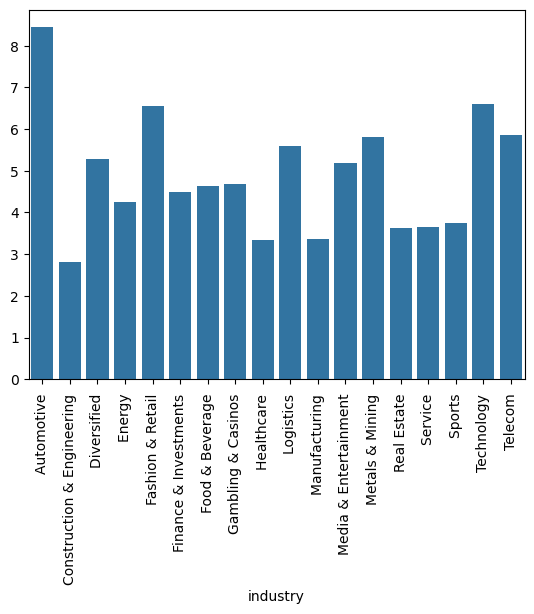

In [72]:
sb.barplot(x=avnw.index,y=avnw.values)
plt.xticks(rotation=90)
plt.show()

In [108]:
df

,rank,name,networth,age,country,source,industry
0,1,Elon Musk,219.0,50,United States,"Tesla, SpaceX",Automotive
1,2,Jeff Bezos,171.0,58,United States,Amazon,Technology
2,3,Bernard Arnault & family,158.0,73,France,LVMH,Fashion & Retail
3,4,Bill Gates,129.0,66,United States,Microsoft,Technology
4,5,Warren Buffett,118.0,91,United States,Berkshire Hathaway,Finance & Investments
...,...,...,...,...,...,...,...
2595,2578,Jorge Gallardo Ballart,1.0,80,Spain,pharmaceuticals,Healthcare
2596,2578,Nari Genomal,1.0,82,Philippines,apparel,Fashion & Retail
2597,2578,Ramesh Genomal,1.0,71,Philippines,apparel,Fashion & Retail
2598,2578,Sunder Genomal,1.0,68,Philippines,garments,Fashion & Retail


In [109]:
ma=np.mean(df.age)


In [110]:
mda=np.median(df.age)
mda

64.0

In [111]:
o=df.groupby('name')[['networth','age']].sum().nlargest(1,'age')
o

,networth,age
name,,
Wang Yanqing & family,6.8,130


In [112]:
y=df.groupby('name')[['networth','age']].sum().nsmallest(1,'age')
y

,networth,age
name,,
Kevin David Lehmann,2.4,19


['United States' 'France' 'India' 'Mexico' 'China' 'Canada' 'Spain'
 'Germany' 'Hong Kong' 'Italy' 'Australia' 'Austria' 'Japan' 'Indonesia'
 'Switzerland' 'Chile' 'Russia' 'Singapore' 'Sweden' 'Czechia'
 'United Kingdom' 'Brazil' 'Israel' 'Netherlands' 'Ireland' 'Nigeria'
 'Denmark' 'Thailand' 'Cyprus' 'Malaysia' 'Taiwan' 'Monaco' 'Colombia'
 'New Zealand' 'South Korea' 'Belgium' 'South Africa' 'Philippines'
 'Egypt' 'Greece' 'Norway' 'Vietnam' 'Poland' 'Eswatini (Swaziland)'
 'Peru' 'Algeria' 'Kazakhstan' 'Georgia' 'Portugal' 'Turkey' 'Finland'
 'Ukraine' 'Argentina' 'Belize' 'Venezuela' 'Lebanon' 'Zimbabwe' 'Romania'
 'United Arab Emirates' 'Oman' 'Iceland' 'Guernsey' 'Liechtenstein'
 'Qatar' 'Morocco' 'Bulgaria' 'Macau' 'Slovakia' 'Barbados' 'Uruguay'
 'Nepal' 'Tanzania' 'St. Kitts and Nevis' 'Hungary' 'Estonia']


enter country name India


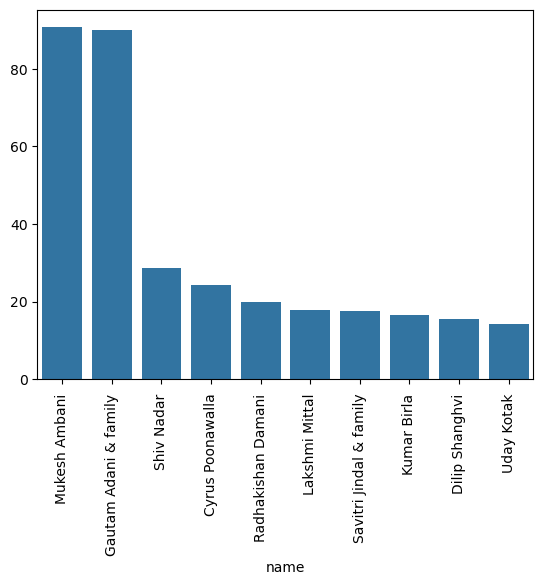

In [122]:
print(df.country.unique())
a=input('enter country name')
c=df[df.country==a]
b=c.groupby('name')['networth'].sum().nlargest(10)
sb.barplot(x=b.index,y=b.values)
plt.xticks(rotation=90)
plt.show()